In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [123]:
# set default font value for plots in this notebook
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
font = {'family': 'sans-serif', 'weight': 'normal', 'size': 20}
plt.rc('font', **font)

In [2]:
power_consumption = pd.read_csv('household_power_consumption.txt', sep=';',low_memory=False)

In [3]:
power_consumption.dropna(inplace=True)

In [4]:
power_consumption[['Sub_metering_1','Sub_metering_2']] = power_consumption[['Sub_metering_1','Sub_metering_2']].astype(str).astype(float)

In [5]:
power_consumption['parsed_datetime'] = pd.to_datetime(power_consumption['Date'] + ' ' + power_consumption['Time'], format='%d/%m/%Y %H:%M:%S')

In [6]:
power_consumption['Weekday'] = power_consumption['parsed_datetime'].apply(datetime.weekday)

In [7]:
power_consumption['Hour'] = power_consumption['parsed_datetime'].dt.hour

In [8]:
power_consumption['Week_hour'] = power_consumption['Weekday']*24 + power_consumption['Hour']

In [9]:
power_consumption['Year'] = power_consumption['parsed_datetime'].dt.year

In [10]:
pc_average_week = power_consumption.groupby('Week_hour')[['Sub_metering_1','Sub_metering_2','Sub_metering_3']].mean()

In [11]:
wh = np.arange(0,168)

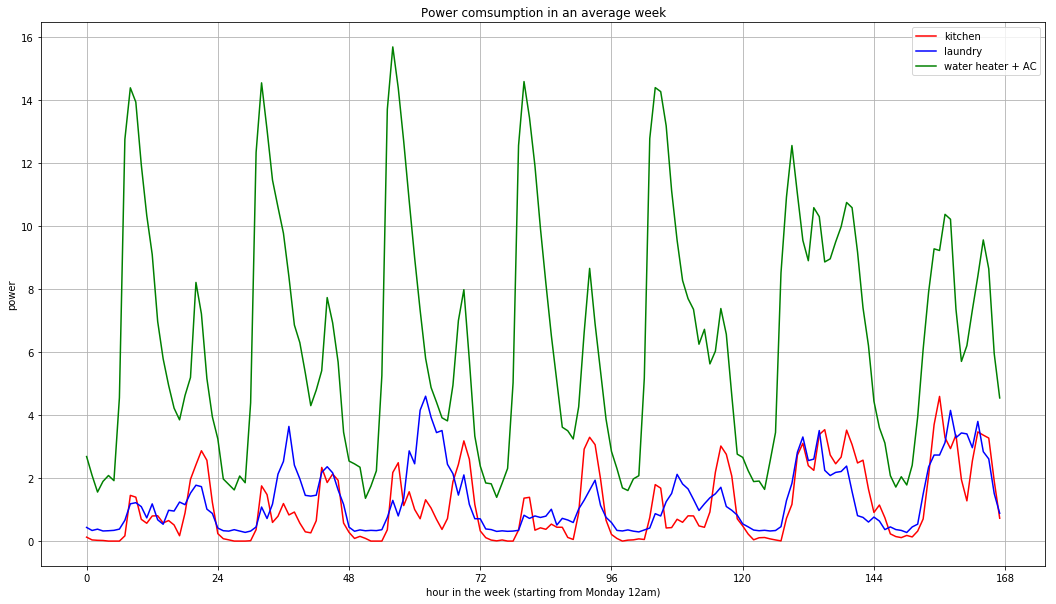

In [12]:
plt.figure(figsize=(18,10))
plt.plot(wh, pc_average_week['Sub_metering_1'], 'r', wh, pc_average_week['Sub_metering_2'], 'b', pc_average_week['Sub_metering_3'], 'g')
plt.xticks(np.arange(0,169,24))
plt.title('Power comsumption in an average week')
plt.xlabel('hour in the week (starting from Monday 12am)')
plt.ylabel('power')
plt.legend(('kitchen','laundry','water heater + AC'))
plt.grid(True)
plt.show()

From the power used by water heater and AC, we can see that, on weekdays this family has almost the same schedule from Monday to Thursday, and on Friday they would come home earlier in the afternoon. On weekends, they tend to stay home on Saturdays and go out more on Sundays, judging from the decrease of AC use on Sunday.

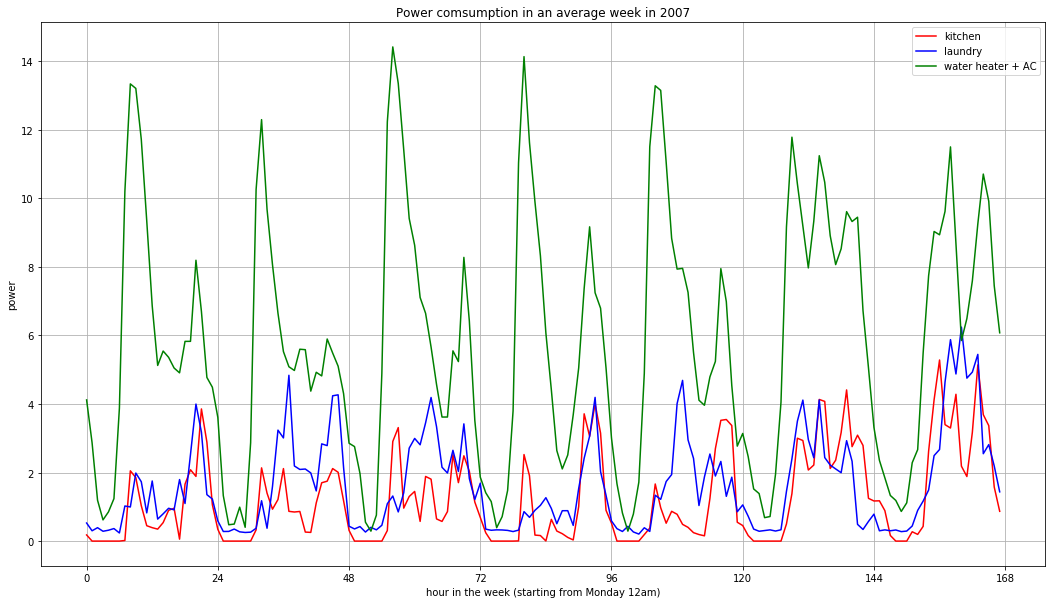

In [13]:
pc_average_week_2007 = power_consumption[power_consumption['Year']==2007].groupby('Week_hour')[['Sub_metering_1','Sub_metering_2','Sub_metering_3']].mean()
plt.figure(figsize=(18,10))
plt.plot(wh, pc_average_week_2007['Sub_metering_1'], 'r', wh, pc_average_week_2007['Sub_metering_2'], 'b', pc_average_week_2007['Sub_metering_3'], 'g')
plt.xticks(np.arange(0,169,24))
plt.title('Power comsumption in an average week in 2007')
plt.legend(('kitchen','laundry','water heater + AC'))
plt.xlabel('hour in the week (starting from Monday 12am)')
plt.ylabel('power')
plt.grid(True)
plt.show()

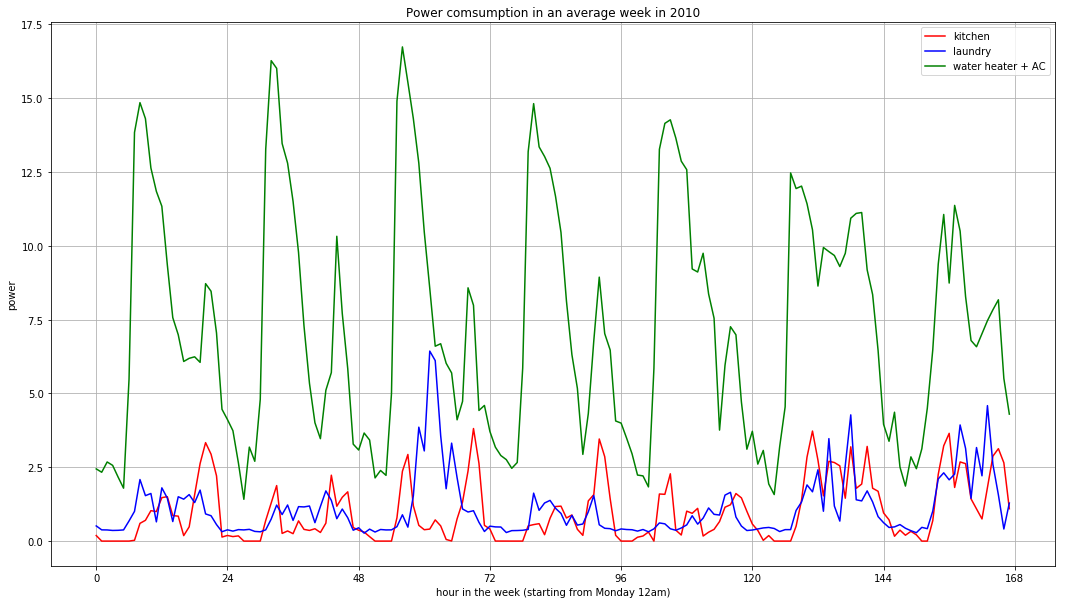

In [14]:
pc_average_week_2010 = power_consumption[power_consumption['Year']==2010].groupby('Week_hour')[['Sub_metering_1','Sub_metering_2','Sub_metering_3']].mean()
plt.figure(figsize=(18,10))
plt.plot(wh, pc_average_week_2010['Sub_metering_1'], 'r', wh, pc_average_week_2010['Sub_metering_2'], 'b', pc_average_week_2010['Sub_metering_3'], 'g')
plt.xticks(np.arange(0,169,24))
plt.title('Power comsumption in an average week in 2010')
plt.legend(('kitchen','laundry','water heater + AC'))
plt.xlabel('hour in the week (starting from Monday 12am)')
plt.ylabel('power')
plt.grid(True)
plt.show()

Comparing the power consumption in a week in 2007 with a week in 2010, we can clearly see the lifestyle of this family has changed. From the power use for laundry, we see that in 2010 laundry is done on mostly Wednesdays and Weekends, while in 2007 it was done on any day throughout the week. We can assume that their work hours are more regular in 2010.


There is a lot more we can do. Here we'll just take a look at their kitchen use.

In [15]:
is_using_kitchen = (power_consumption['Sub_metering_1']>0)*1

In [16]:
power_consumption['is_using_kitchen'] = is_using_kitchen

In [17]:
kitchen_usage_week = power_consumption.groupby('Week_hour')['is_using_kitchen'].mean()*60

In [18]:
kitchen_usage_week_2007 = power_consumption[power_consumption['Year']==2007].groupby('Week_hour')['is_using_kitchen'].mean()*60
kitchen_usage_week_2010 = power_consumption[power_consumption['Year']==2010].groupby('Week_hour')['is_using_kitchen'].mean()*60

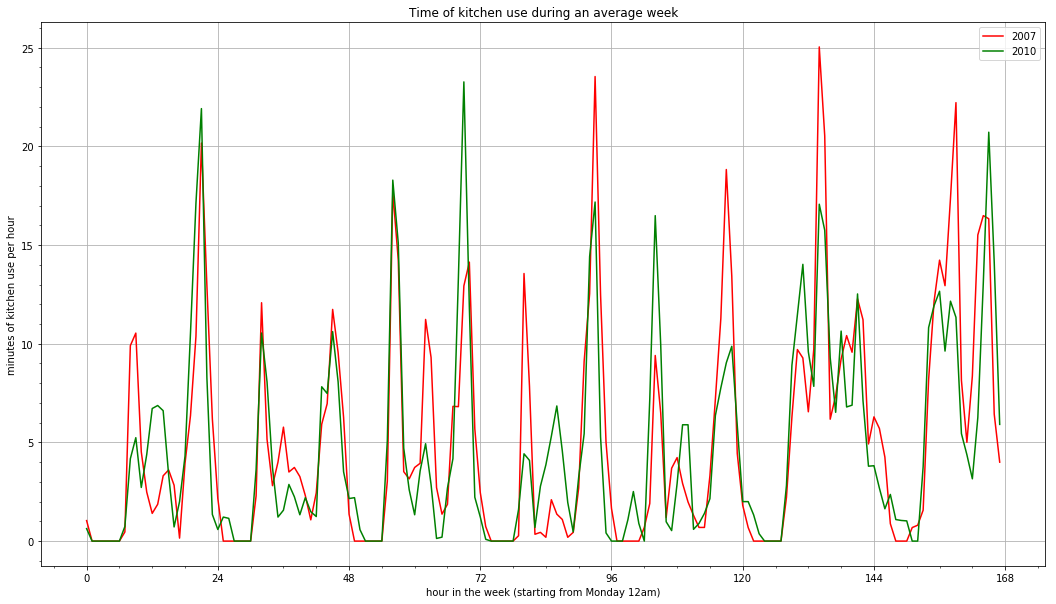

In [19]:
plt.figure(figsize=(18,10))
plt.plot(wh, kitchen_usage_week_2007, 'r', wh, kitchen_usage_week_2010, 'g')
plt.xticks(np.arange(0,169,24))
plt.title('Time of kitchen use during an average week')
plt.grid(True)
plt.minorticks_on()
plt.legend(('2007','2010'))
plt.xlabel('hour in the week (starting from Monday 12am)')
plt.ylabel('minutes of kitchen use per hour')
plt.show()

From the time of kitchen use, we can see the house owner is probably a normal working family. On weekdays, usually they would cook breakfast and dinner but not lunch. On weekends they would get up 1-2 hours later than on weekdays and eat at home.

We can potentially do much more with this dataset in the future. As I was exploring the data captured by the meter in the kitchen, I noticed some repeated patterns in the usage of power. 

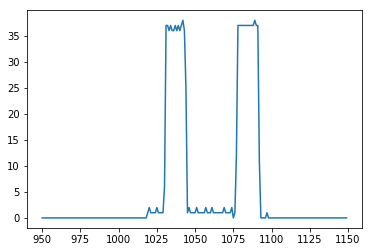

In [20]:
plt.plot(power_consumption['Sub_metering_1'][950:1150])

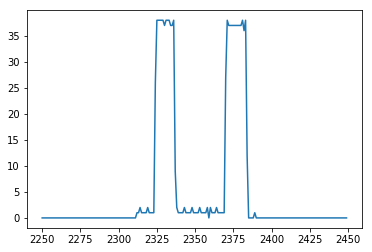

In [21]:
plt.plot(power_consumption['Sub_metering_1'][2250:2450])

For example, we can clearly see a repeated pattern in the two plots above. We should be able to pinpoint this to a specific appliance in the house (maybe a wash cycle of the dish washer). That is to say, from this power usage data of a house, we can potentially resolve every single use of each electrical appliance in this house. From there on we can know an awful lot about this family.

In [24]:
to_check = 0
for i in range(3,power_consumption.shape[0]-3):
    if power_consumption['Sub_metering_1'].iloc[i] > 0:
        to_check = 3
    elif to_check > 0:
        to_check -= 1
        if power_consumption['Sub_metering_1'].iloc[i-3:i+3].any():
            power_consumption['is_using_kitchen'].iloc[i-3:i+3] = 1


C:\Users\ruopei\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Now we group the power consumption by events

In [28]:
pc_event = pd.DataFrame(columns=['parsed_datetime','duration','metering','Weekday','Hour','Week_hour','Year'])
start_time = 0
is_using = 0
for i in range (power_consumption.shape[0]):
    if is_using == 0 and power_consumption['is_using_kitchen'].iloc[i] == 1:
        start_time = i
        is_using = 1
    elif is_using == 1 and power_consumption['is_using_kitchen'].iloc[i] == 0:
        is_using = 0
        if i-start_time > 15:
            current_event = pd.DataFrame({'parsed_datetime':power_consumption['parsed_datetime'].iloc[start_time],
                                          'duration': i-start_time,
                                          'metering': [power_consumption['Sub_metering_1'].iloc[start_time:i].values],
                                          'Weekday': power_consumption['Weekday'].iloc[start_time],
                                          'Hour': power_consumption['Hour'].iloc[start_time],
                                          'Week_hour': power_consumption['Week_hour'].iloc[start_time],
                                          'Year': power_consumption['Year'].iloc[start_time]})
            pc_event = pc_event.append(current_event,ignore_index=True)


Below is an example showing some power comsumption events

Text(0,0.5,'power consumption')

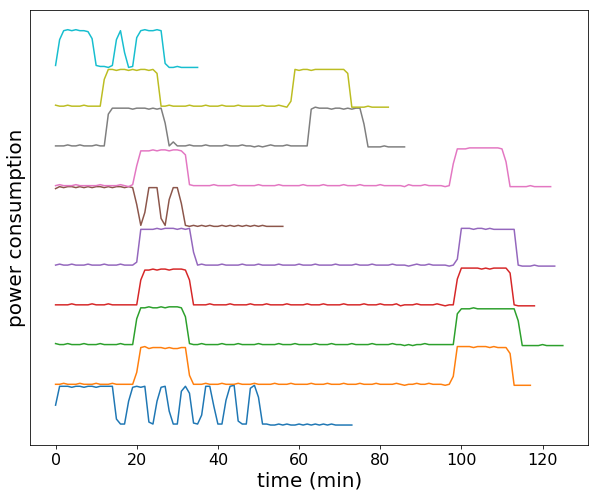

In [159]:
plt.figure(figsize=(10,8))
for i in range(90,100):
    plt.plot(i*40+pc_event['metering'].iloc[i])
plt.xlabel('time (min)')
plt.yticks(())
plt.ylabel('power consumption')

In order to find the power comsumption signatures of certain electrical appliances, we hope to classify events and look for the events that are similar to each other.

To better visualize the similarities between individual events, we use multidimensional scaling to embed the events in a 2D space. 

The pairwise disimilarities of the events are calculated with dynamic time warping.

In [30]:
from cydtw import dtw
num_events = pc_event.shape[0]
d = np.ndarray(shape=(num_events,num_events))
for i in range(num_events):
    for j in range(num_events):
        x = np.append(0,pc_event['metering'].iloc[i])
        y = np.append(0,pc_event['metering'].iloc[j])
        d[i][j] = dtw(x.reshape(-1,1),y.reshape(-1,1))

In [31]:
from sklearn.manifold import MDS
M = MDS(n_components=2, metric=True, dissimilarity='precomputed')
Y = M.fit(d)
pos = Y.embedding_

Using an unsupervised clustering method DBSCAN, we found one cluster of events.

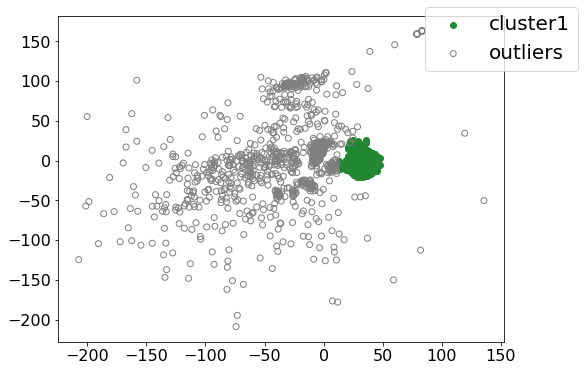

In [152]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=16, min_samples=60, metric="precomputed")
label = db.fit_predict(d)
fig = plt.figure(figsize=(8,6))
plt.scatter(pos[:,0][label==0],pos[:,1][label==0],c=[0.13,0.53,0.2])
plt.scatter(pos[:,0][label==-1],pos[:,1][label==-1], facecolors='none',edgecolors=[0.5,0.5,0.5])
# plt.scatter(pos[:,0][label==1],pos[:,1][label==1],c=[0.4,0.8,0.93])
legend = plt.legend(('cluster1', 'outliers'),bbox_to_anchor=(0.8, 0.8))

We can take a look at the events within the cluster:

Text(0,0.5,'power consumption')

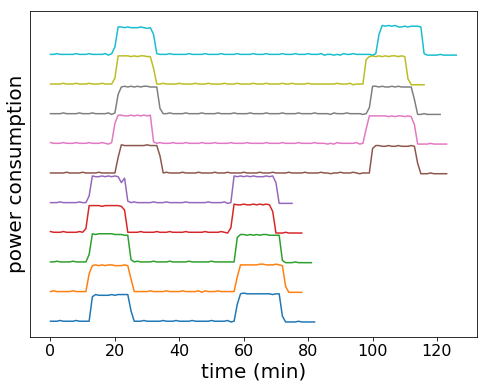

In [167]:
fig = plt.figure(figsize=(8,6))
for i in range(10,20):
    plt.plot(pc_event[label==0]['metering'].iloc[i]+i*40)
plt.xlabel('time (min)')
plt.yticks(())
plt.ylabel('power consumption')

We can clearly see these events have very similar signature. After some research online, I think this pattern agrees with the power consumption of dishwashers.

Some events outside the cluster:

Text(0,0.5,'power consumption')

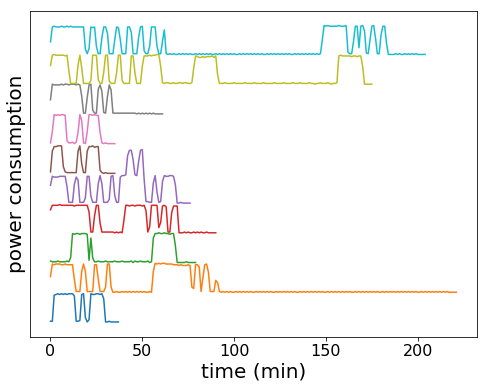

In [168]:
fig = plt.figure(figsize=(8,6))
for i in range(20,30):
    plt.plot(pc_event[label==-1]['metering'].iloc[i]+i*40)
plt.xlabel('time (min)')
plt.yticks(())
plt.ylabel('power consumption')

We know that there are mainly three appliances in this particular kitchen: a dishwasher, a microwave and an oven. These events should be the oven.

Text(0,0.5,'counts')

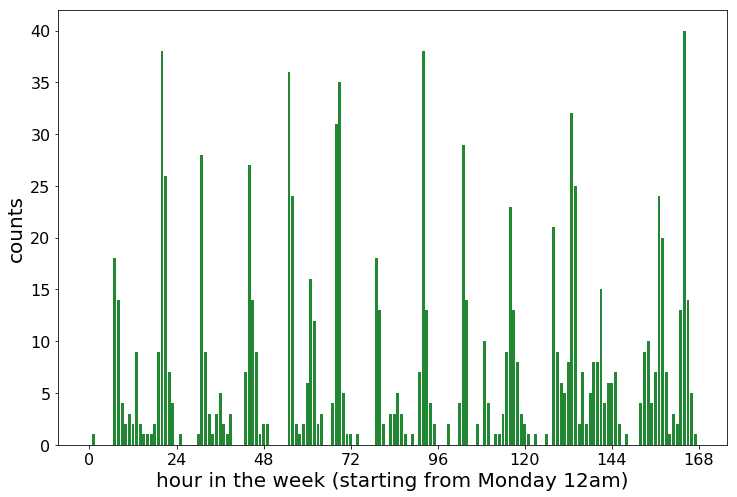

In [162]:
fig = plt.figure(figsize=(12,8))
for i in range(168):
    plt.bar(i,sum(pc_event[label==0]['Week_hour']==i),color=[0.13,0.53,0.2])
plt.xticks(np.arange(0,169,24))
plt.xlabel('hour in the week (starting from Monday 12am)')
plt.ylabel('counts')


In [35]:
# %matplotlib notebook
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(pos[:,0],pos[:,1],pos[:,2],c=[0.7,0.7,0.7])

Let's compare the dishwasher and the oven usage during an average week:

Text(0,0.5,'fraction of usage')

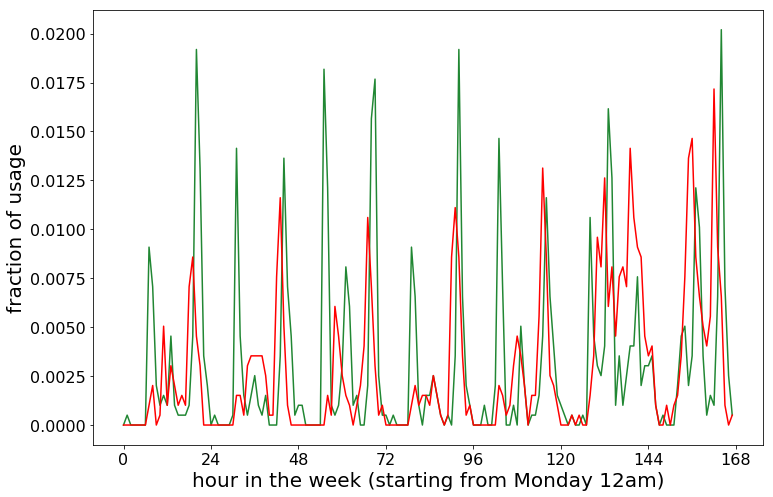

In [165]:
ct_dishwasher = np.zeros((168,1))
ct_oven = np.zeros((168,1))
for i in range(168):
    ct_dishwasher[i] = sum(pc_event[label==0]['Week_hour']==i)
    ct_oven[i] = sum(pc_event[label==-1]['Week_hour']==i)

fig = plt.figure(figsize=(12,8))
plt.plot(range(168),ct_dishwasher/pc_event.shape[0],color=[0.13,0.53,0.2])
plt.plot(range(168),ct_oven/pc_event.shape[0],color='r')
plt.xticks(np.arange(0,169,24))
plt.xlabel('hour in the week (starting from Monday 12am)')
plt.ylabel('fraction of usage')

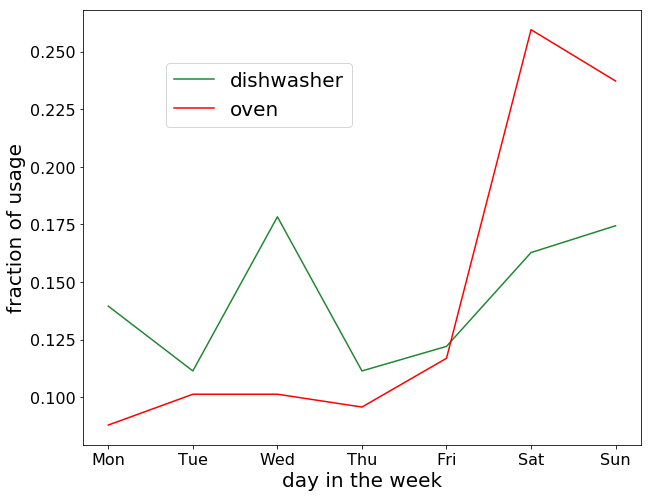

In [134]:
ct_dishwasher = np.zeros((7,1))
ct_oven = np.zeros((7,1))
for i in range(7):
    ct_dishwasher[i] = sum(pc_event[label==0]['Weekday']==i)
    ct_oven[i] = sum(pc_event[label==-1]['Weekday']==i)

fig = plt.figure(figsize=(10,8))
plt.plot(range(7),ct_dishwasher/pc_event[label==0].shape[0],color=[0.13,0.53,0.2])
plt.plot(range(7),ct_oven/pc_event[label==-1].shape[0],color='r')
plt.xticks(np.arange(0,7,1),('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'))
plt.xlabel('day in the week')
plt.ylabel('fraction of usage')
legend = plt.legend(('dishwasher', 'oven'),bbox_to_anchor=(0.5, 0.9))

We can see a clear discrepancy between the dishwasher and the oven usage in this family.

From this observation, we can make a confident guess that this family would cook the meals for several days on weekends. We can see the house owner is probably a normal working family.

And there is much more we can do.